In [2]:
! pip install -qU pandas matplotlib scikit-learn scipy folium

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
import folium
import os

postcode_df = pd.read_csv("./data/postcode-list.csv",encoding='latin-1')
df_map = pd.read_csv('./data/starbucks.csv',encoding='latin-1')

df_map.head()

/Users/vandycklai/Developer/MCX-ray/notebook/exploration/location


,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [11]:
postcode_df.head()

,postcode,point_coord,street,city,state,is_klang_valley,is_peninsular,is_east_malaysia,is_kuala_lumpur
0,1000,POINT(6.4312 100.2056),Alor Redeh,Kangar,Perlis,0,1,0,0
1,1000,POINT(6.4312 100.2056),Alor Tok Terang,Kangar,Perlis,0,1,0,0
2,1000,POINT(6.4312 100.2056),Bohor Gelam,Kangar,Perlis,0,1,0,0
3,1000,POINT(6.4312 100.2056),Jalan Abi Tok Hashim,Kangar,Perlis,0,1,0,0
4,1000,POINT(6.4312 100.2056),Jalan Alor Sena,Kangar,Perlis,0,1,0,0


In [12]:
df_malaysia = df_map[df_map["Country"] == "MY"]
df_malaysia.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
9708,Starbucks,22145-218090,Kluang Mall,Licensed,"Jln Rambutan, G-10, Ground Floor","Bandar Kluang, Kluang",1,MY,86000,NaN,GMT+08:00 Asia/Kuala_Lumpur,103.32,2.04
9709,Starbucks,22152-218094,Petronas Bayu Senibong,Licensed,"Taman Bayu Senibong, Mukim Plentong, PTD 148135",Bayu Senibong,1,MY,81750,NaN,GMT+08:00 Asia/Kuala_Lumpur,103.80,1.49
9710,Starbucks,18927-184364,Seri Alam,Licensed,"8 Jalan Suria, Bandar Seri Alam",Johor Bahru,1,MY,81750,NaN,GMT+08:00 Asia/Kuala_Lumpur,103.87,1.50
9711,Starbucks,1923-137105,The Zone,Licensed,"88 Jalan Ibrahim Sutan, Stulang Laut, Level 1",Johor Bahru,1,MY,80300,07-2241702,GMT+08:00 Asia/Kuala_Lumpur,103.78,1.47
9712,Starbucks,50001-272225,Senai Airport,Licensed,"Lot S11, Aero Mall, Senai International Airport",Johor Bahru,1,MY,81250,NaN,GMT+08:00 Asia/Kuala_Lumpur,103.67,1.64


In [18]:
# Get latitude and longitude
X = df_malaysia.iloc[:, -2:].values
X

array([[103.32,   2.04],
       [103.8 ,   1.49],
       [103.87,   1.5 ],
       [103.78,   1.47],
       [103.67,   1.64],
       [103.75,   1.58],
       [103.76,   1.46],
       [103.71,   1.49],
       [103.8 ,   1.55],
       [103.8 ,   1.55],
       [103.66,   1.48],
       [103.76,   1.46],
       [103.62,   1.64],
       [103.6 ,   1.68],
       [103.75,   1.46],
       [102.6 ,   2.05],
       [103.88,   1.51],
       [103.66,   1.42],
       [102.82,   2.51],
       [103.79,   1.53],
       [100.37,   6.13],
       [100.38,   6.1 ],
       [ 99.73,   6.29],
       [ 99.73,   6.34],
       [ 99.85,   6.31],
       [100.5 ,   5.66],
       [102.25,   2.21],
       [102.25,   2.19],
       [102.25,   2.19],
       [102.22,   2.21],
       [102.26,   2.19],
       [102.25,   2.2 ],
       [101.79,   2.52],
       [101.91,   2.7 ],
       [101.38,   4.47],
       [101.79,   3.42],
       [101.77,   3.39],
       [103.33,   3.82],
       [103.37,   3.81],
       [103.33,   3.81],


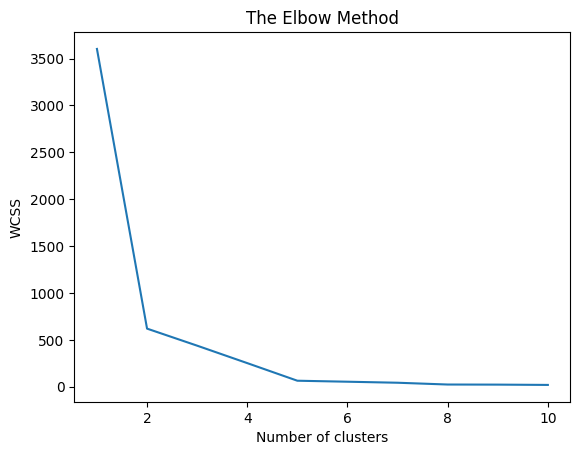

In [19]:
# Elbow method for best cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters = i,
        init = 'k-means++',
        random_state = 42
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
kmeans = KMeans(
    n_clusters = 5,
    init = 'k-means++',
    random_state = 42
)
y_kmeans = kmeans.fit_predict(X)
# y_kmeans
df_malaysia['cluster'] = y_kmeans + 1
df_malaysia

/var/folders/p1/d1ynn_dj70gb669w1pst351m0000gn/T/ipykernel_76186/2709306201.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_malaysia['cluster'] = y_kmeans + 1


,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,cluster
9708,Starbucks,22145-218090,Kluang Mall,Licensed,"Jln Rambutan, G-10, Ground Floor","Bandar Kluang, Kluang",1,MY,86000,NaN,GMT+08:00 Asia/Kuala_Lumpur,103.32,2.04,3
9709,Starbucks,22152-218094,Petronas Bayu Senibong,Licensed,"Taman Bayu Senibong, Mukim Plentong, PTD 148135",Bayu Senibong,1,MY,81750,NaN,GMT+08:00 Asia/Kuala_Lumpur,103.80,1.49,3
9710,Starbucks,18927-184364,Seri Alam,Licensed,"8 Jalan Suria, Bandar Seri Alam",Johor Bahru,1,MY,81750,NaN,GMT+08:00 Asia/Kuala_Lumpur,103.87,1.50,3
9711,Starbucks,1923-137105,The Zone,Licensed,"88 Jalan Ibrahim Sutan, Stulang Laut, Level 1",Johor Bahru,1,MY,80300,07-2241702,GMT+08:00 Asia/Kuala_Lumpur,103.78,1.47,3
9712,Starbucks,50001-272225,Senai Airport,Licensed,"Lot S11, Aero Mall, Senai International Airport",Johor Bahru,1,MY,81250,NaN,GMT+08:00 Asia/Kuala_Lumpur,103.67,1.64,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9937,Starbucks,7028-254567,Sooka Sentral (Closed),Licensed,"Jalan Stesen Sentral 5, G2B, Ground Floor",Kuala Lumpur Sentral,14,MY,50470,03-27807188,GMT+08:00 Asia/Kuala_Lumpur,101.69,3.13,1
9938,Starbucks,49170-267228,Labuan Airport,Licensed,"L1L06, Level 1, Landside, Labuan Airport, Jala...",Labuan,15,MY,87015,NaN,GMT+000000 Asia/Kuching,115.26,5.30,2
9939,Starbucks,29788-255372,KSL Resort,Joint Venture,"32, Jalan Seladang, Taman Abad, Johor Bahru",Johor,16,MY,80250,NaN,GMT+08:00 Asia/Kuala_Lumpur,103.76,1.48,3
9940,Starbucks,26648-244844,Komtar JBCC,Licensed,"Lot No.239, Second Floor, JBCC, Johor Bahru Ci...",Johor Bahru,16,MY,80000,NaN,GMT+08:00 Asia/Kuala_Lumpur,103.76,1.46,3


In [59]:
m = folium.Map(
    [
        df_malaysia['Latitude'].mean(),
        df_malaysia['Longitude'].mean()
    ],
    # tiles='Starbucks positions',
    zoom_start=8
)
# Layers for cluster
layer1 = folium.FeatureGroup(name= '<u><b>group1</b></u>',show= True)
m.add_child(layer1)
layer2 = folium.FeatureGroup(name= '<u><b>group2</b></u>',show= True)
m.add_child(layer2)
layer3 = folium.FeatureGroup(name= '<u><b>group3</b></u>',show= True)
m.add_child(layer3)
layer4 = folium.FeatureGroup(name= '<u><b>group4</b></u>',show= True)
m.add_child(layer4)
layer5 = folium.FeatureGroup(name= '<u><b>group5</b></u>',show= True)
m.add_child(layer5)
layer6 = folium.FeatureGroup(name= '<u><b>group6</b></u>',show= True)
m.add_child(layer6)

my_symbol_css_class= """ <style>
.fa-g1:before {
    font-family: Arial; 
    font-weight: bold;
    font-size: 12px;
    color: black;
    background-color:white;
    border-radius: 10px; 
    white-space: pre;
    content: ' g1 ';
    }
.fa-g2:before {
    font-family: Arial; 
    font-weight: bold;
    font-size: 12px;
    color: black;
    background-color:white;
    border-radius: 10px; 
    white-space: pre;
    content: ' g2 ';
    }
.fa-g3:before {
    font-family: Arial; 
    font-weight: bold;
    font-size: 12px;
    color: black;
    background-color:white;
    border-radius: 10px; 
    white-space: pre;
    content: ' g3 ';
    }
.fa-g4:before {
    font-family: Arial; 
    font-weight: bold;
    font-size: 12px;
    color: black;
    background-color:white;
    border-radius: 10px; 
    white-space: pre;
    content: ' g4 ';
    }
    .fa-g5:before {
    font-family: Arial; 
    font-weight: bold;
    font-size: 12px;
    color: black;
    background-color:white;
    border-radius: 10px; 
    white-space: pre;
    content: ' g5 ';
    }
    .fa-g6:before {
    font-family: Arial; 
    font-weight: bold;
    font-size: 12px;
    color: black;
    background-color:white;
    border-radius: 10px; 
    white-space: pre;
    content: ' g6 ';
    }
    .fa-g7:before {
    font-family: Arial; 
    font-weight: bold;
    font-size: 12px;
    color: black;
    background-color:white;
    border-radius: 10px; 
    white-space: pre;
    content: ' g6 ';
    }
</style>
"""
# the below is just add above  CSS class to folium root map      
m.get_root().html.add_child(folium.Element(my_symbol_css_class))
# then we just create marker and specific your css class in icon like below
for index, row in df_malaysia.iterrows():
    if row['cluster'] == 1 :
        color='black'
        fa_symbol = 'fa-g1'
        lay = layer1
    elif row['cluster'] == 2:
        color='purple'
        fa_symbol = 'fa-g2'
        lay = layer2     
    elif row['cluster'] == 3:
        color='orange'
        fa_symbol = 'fa-g3'
        lay = layer3
    elif row['cluster'] == 4:
        color='blue'
        fa_symbol = 'fa-g4'
        lay = layer4
    elif row['cluster'] == 5:
        color='green'
        fa_symbol = 'fa-g5'
        lay = layer4
    elif row['cluster'] == 6:
        color='gray'
        fa_symbol = 'fa-g6'
        lay = layer4
    elif row['cluster'] == 7:
        color='yellow'
        fa_symbol = 'fa-g7'
        lay = layer4
        
    folium.Marker(
        location=[
            row['Latitude'],
            row['Longitude']
        ],
        title = row['Store Name']+ ' group:{}'.format(str(row['cluster'])),
        popup = row['Store Name']+ ' group:{}'.format(str(row['cluster'])),
        icon= folium.Icon(color=color, icon=fa_symbol, prefix='fa')
    ).add_to(lay)

In [60]:
layer_list = [layer1,layer2,layer3,layer4, layer5]
color_list = ['black','purple','orange','blue', 'green']
for g in df_malaysia['cluster'].unique():
# this part we apply ConvexHull theory to find the boundary of each group
    # first, we have to cut the lat lon in each group 
    latlon_cut = df_malaysia[
        df_malaysia['cluster'] == g
    ].iloc[:, -3:-1]

    # second, scipy already provides  the great function for ConvexHull
    # we just throw our dataframe with lat lon in this function
    hull = ConvexHull(latlon_cut.values)
    # and with magic, we can have new lat lon boundary of each group
    Lat = latlon_cut.values[hull.vertices,0]
    Long = latlon_cut.values[hull.vertices,1] 
    
    median_hq_lat = sum(Lat)/len(Lat)
    median_hq_long = sum(Long)/len(Long)

    # the we create dataframe boundary and convert it to list of lat lon 
    # for plotting polygon in folium
    cluster = pd.DataFrame({'lat':Lat,'lon':Long })       
    area = list(zip(cluster['lat'],cluster['lon']))
    # plot polygon
    list_index = g - 1 # minus 1 to get the same index 
    lay_cluster = layer_list[list_index] 
    
    bean_pin = folium.CustomIcon(
        icon_image= "https://upload.wikimedia.org/wikipedia/commons/c/c0/MrBeanLogo.png",
        icon_size=(30, 30)
    )
    folium.Marker(
        location=[
            median_hq_long,
            median_hq_lat
        ],
        title = "Mr Beans HQ " + str(g),
        popup = "Mr Beans HQ " + str(g),
        icon= bean_pin
    ).add_to(m)
    
    
    folium.Polygon(locations=area,
        color=color_list[list_index],
        weight=2,
        fill=True,
        fill_opacity=0.1,
        opacity=0.8).add_to(lay_cluster) 
            
# to let the map have selectd layer1 layer2 you created
folium.LayerControl(collapsed=False,position= 'bottomright').add_to(m)
# save it to html then we can send the file to our colleagues
m

In [61]:
df_malaysia.to_csv("starbucks_malaysia.csv")